# STA130 TUT 02 (Sep20)<br> <u> Data Visualization with ChatBots <u>

## Review  / Questions [15 minutes]
1. Follow up Questions and clarifications regarding the content of Sep13 TUT and Sep16 LEC
    > Figures are created with code, so comfort with parameters and arguments, and `for` loops, etc. is a prerequesitve for having any sensbile recognition of the logic of the code creating a function...

## (Working from Documentation) Demo [60 minutes]

1. Use the [penguins](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) data set to demonstrate [bar plots](https://plotly.com/python/bar-charts/), [histograms](https://plotly.com/python/histograms/), and [box plots](https://plotly.com/python/box-plots/) using [`plotly`](https://plotly.com/python/) in a Jupyter notebook
    1. Click the link for the type of plot, and figure out how to make the plot using some example from the [penguins](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) data set... *this excercise has been done below, but it's easy to delete the code from the cells and do it again from scratch as a demonstration*
        1. Use the cartoons to breifly discuss "quantitative versus qualitative data"
        2. Discuss the "bins" (`nbins`) parameter (demonstrated [here](https://plotly.com/python/histograms/#choosing-the-number-of-bins))
        3. Discuss how to "read a box plot" by explaining what the different parts of a box plot mean
        
    2. Use the plots you've created to explain the primary location (mean, median, and mode) and scale (standard deviation, range, interquartile range) concepts... 
        1. There is a fun [interactive widget](https://plotly.com/python/histograms/#histograms-in-dash) that might be helpful...
        2. `df.describe()` is probably useful for discussing medians, range, and interquartile range... and mode is useful in the context of a bar plot...
        3. If time permits, it might be helpful to use some alternative data sets to illustrate skew ([tips](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv)), outliers ([fraud](https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv)), and true modality ([old faithful](https://gist.githubusercontent.com/hogwild/c2704a1ae38c0a36983bc13121050dac/raw/7fd577be21752939375d92cd3a808558106e903b/oldFaithfulGeyserDataset.csv)) (as opposed to the modality from subpopulations, like how the modality in the penguins data goes away if you're looking only at individual species)
    

In [6]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### You may need to the following for `plotly` figures to render!

In [7]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

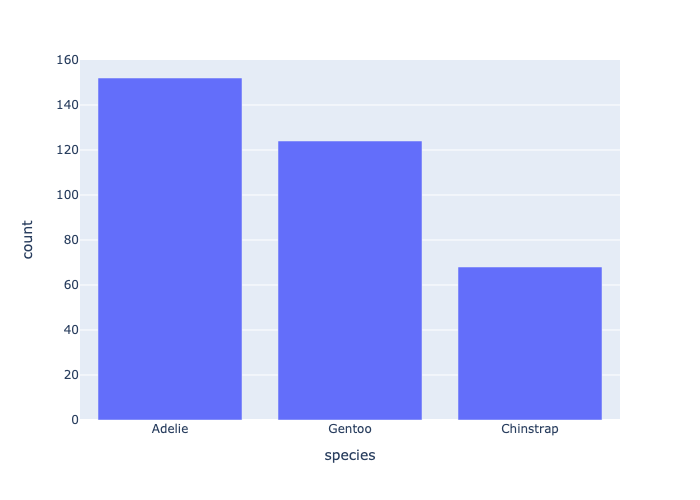

In [9]:
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Canada'")
#fig = px.bar(data_canada, x='year', y='pop')

# OOPS! This needs an x-position and a y-height value!
fig = px.bar(pingees.species.value_counts().reset_index(), x='species', y='count')
#fig.show() # use 
fig.show(renderer="png") #for all submissions on GitHub and MarkUs
# So what is this showing? 
# (And below we show what the `pingees.species.value_counts().reset_index()` "trick" is)

In [9]:
pingees.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
pingees.species.value_counts().reset_index()

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [14]:
#import plotly.express as px
#df = px.data.tips()
#fig = px.histogram(df, x="total_bill")
fig = px.histogram(pingees, x="flipper_length_mm")
fig.show()

# So what is this showing? 

# This automatically calculates the "counts" and 
# doesn't put "spaces" between the bars (indicating it's numeric not categorical data)

#### This probably applies to this data, e.g., the `flipper_length_mm` variable...
and is likely something to come back to when thinking about the application of "means" and "standard deviations"...


![https://allisonhorst.com/data-science-art](https://cdn.myportfolio.com/45214904-6a61-4e23-98d6-b140f8654a40/e9665844-7316-4409-9340-84d7dec12b16_rwc_8x0x1894x1481x1894.png?h=2acdee343bc6b1863d0bbef964850192)

In [20]:
#import plotly.express as px
#df = px.data.tips()
## Here we use a column with categorical data
#fig = px.histogram(df, x="day")
fig = px.histogram(pingees, x="species")
fig.show()
# So what happened here? 
# (There's a hint below showing that `Object` type data is treated as categorical data)

In [21]:
pingees.dtypes # remember this?

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
body_mass_g          float64
sex                   object
dtype: object

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhb3mixP0J2LWeQsK3VWxL8RM0tFg5-8KBLLMYSPfjzZrGw60PCyknoxmqJqyvn6yR2lS4J_8sblZs3blNsagoCq9JHxjSPhtv8PH3DnBZEmPl7zcNZaSjPwCoMQ1j6Cu8tFGULP8uZQmfV/s1600/horst+discrete+continuous.jpg)

![](https://pbs.twimg.com/media/Ehh6v4kVoAIbotc?format=jpg&name=4096x4096)

In [28]:
#import plotly.express as px
#df = px.data.tips()
#fig = px.box(df, y="total_bill")
fig = px.box(pingees, y="flipper_length_mm")
fig.show()

# How does this compare to the alternative histogram presentation of this data?

In [29]:
#import plotly.express as px
#df = px.data.tips()
#fig = px.box(df, x="time", y="total_bill")
fig = px.box(pingees, x="species", y="flipper_length_mm")
fig.show()

# Does this help explain things?

In [31]:
# You have to look farther into the plotly histogram documention
# but if you scroll a little bit you can find this

#import plotly.express as px
#df = px.data.tips()
#fig = px.histogram(df, x="total_bill", color="sex")
fig = px.histogram(pingees, color="species", x="flipper_length_mm")
fig.show()

# Does this help explain things?

In [33]:
# And if you look just a little farther back in the plotly box plot documention
# you can find this... just a little bit down

#import plotly.express as px
#df = px.data.tips()
fig = px.box(pingees, x="species", y="flipper_length_mm", points="all")
fig.show()

# Do you like this better? If so, why?

## Communication [25 minutes]

1. **[10 minutes]** Break into 4 groups of 6 students (or as many as possible, evenly distributed across groups) and prepare a speech describing a generic strategy or general sequence of steps you would take to understand a data set
    1. **[15 minutes]** After the group that wants to go first presents, all subsequent groups will add or clarify to the previous preseantations
    
## Homework [0 minutes]

> Code and write all your answers (for both the "Prelecture" and "Postlecture" HW) in a python notebook (in code and markdown cells) and include the link(s) to your GPTchat transcript log at the top of your notebook. Save your python jupyter notebook in your own account and "repo" on github.com and submit a link to that notebook though Quercus for assignment marking.
>
> *The marking rubic (which may award partial credit) is as follows:*
>
> - [0.1 points]: All ChatGPT transcript logs are reported at the top of the notebook
> - [0.2 points]: Assignment completion confirmed by ChatGPT log interactions for "2AB"
> - [0.2 points]: Evaluation of written communication for "2C"
> - [0.1 points]: Correct answers for "3"
> - [0.3 points]: Assignment completion confirmed by ChatGPT log interactions for "4"
> - [0.1 points]: Evidence of activity for "5"

### Prelecture HW

1. Use [`fig.add_[h/v]line()`](https://plotly.com/python/horizontal-vertical-shapes/) and [`fig.add_[h/v]rect()`](https://plotly.com/python/line-charts/)
to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of `flipper_length_mm` for each `species` onto the histograms of `flipper_length_mm` for each `species` in the penguins dataset
> There are several ways to approach this problem... you will likely be very pleased when you run the code returned to you as the result of pasting ths question in as a prompt to ChatGPT... this is a perfectly fine approach to the experience this problem intends you to have
> - If you take this approach, after getting working code from ChatGPT with the desired annotations, first ask ChatGPT to adjust the code so the annotations don't overlap each other and are readible and examine the result; then, ask ChatGPT to present this information as a legend to make it even clearer... if ChatGPT can make figures for you so easily, then you might as well ask ChatGPT to make them look nice in ways you prefer, right?
>
> You could also likely figure out how to do this problem for yourself by looking at the provided documentation links and perhaps using some additional google searchers or ChatGPT prompts to help out with specific problems or examples
>
> - If you're interested in really figuring things out for yourself and understanding a little better how the code works, that's great, and definitely feel free to go ahead and do so (and to use ChatGPT prompts and google searchers to make this process even easier); but, at this stage the point of this problem is to understand the general ideas of figures themselves, as opposed to being an expert about the code that generated them

2. Transition your ChatGPT session from the previous problem to repeat the previous problem, but this time using [`seaborn` *kernel density estimation* (KDE) plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to produce the desired figures organized in row of three plots
    1. `seaborn` builds on top of `matplotlib` so [ax.axhspan(...)](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py) or [ax.fill_between(...)](
    https://matplotlib.org/stable/gallery/lines_bars_and_markers/span_regions.html) from `matplotlib` could be combined with the `seaborn` KDE... 
    > ...this might be something to suggest to ChatGPT [if it tries to keep using `plotly` or a KDE function rather than a KDE plotting functionality...](https://chatgpt.com/share/7d4e9104-8186-448f-849c-2eb72568c6d1)
    2. Briefly examine the [`seaborn` themes](https://seaborn.pydata.org/tutorial/aesthetics.html) based on `sns.set_style()` and `sns.set_theme()` and [colors](https://seaborn.pydata.org/tutorial/color_palettes.html) based on the `palette` parameter and `sns.set_palette()`, e.g.,
    
    ```python
    sns.set_style("whitegrid")#sns.set_style("dark")
    #  exists but functions often access and set that directly
    sns.boxplot(..., hue='column', palette="colorblind") 
    ```    
    
    and then interact with ChatGPT to change the coloring of the figure to something that you like and looks more clear to you... 
    > ...again, if ChatGPT can make figures for you so easily, then you [might as well ask ChatGPT to make them look nice in ways you prefer, right?](https://chatgpt.com/share/7d4e9104-8186-448f-849c-2eb72568c6d1)

    3. Discuss the differences between hisograms and kernel density estimators with ChatGPT and summarize your preference for one or the other and your rationale for this preference, including comments on the choice of the number of histogram bins (e.g., `nbins` in [`plotly`](https://www.google.com/search?client=safari&rls=en&q=plotly+nbins&ie=UTF-8&oe=UTF-8)) and the [KDE bandwidth](https://en.wikipedia.org/wiki/Kernel_density_estimation) [linked from [here](https://plotly.com/python/violin/#split-violin-plot)] (e.g., `bw_adjust` in [`seaborn`](https://stackoverflow.com/questions/37932283/confusion-with-bandwidth-on-seaborns-kdeplot)) choices for these methods <!-- 4. Report on your preferences between `plotly` and `seaborn` in terms of usability and the general visual aestetics -->


3. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
    1. Which data sets have similar means and similar variances
    2. Which data sets have similar means but quite different variances
    3. Which data sets have similar variances but quite different means
    4. Which data sets have quite different means and quite different variances

> Can you answer these questions immediately? If not, first review what the basic ideas of means and variances (and standard deviations) are. Their mathematical definitions are give below, but these are just the definitions and you may or may not yet find them helpful for understanding the intuition of these concepts...
>
>    - mean $\displaystyle \bar x = \frac{1}{n}\sum_{i=1}^n x_i$ 
>    - variance $\displaystyle s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2$
>    - standard deviation $\displaystyle s = \sqrt{s^2}$
>
> It's also possible that you or ChatGPT could answer these questions by looking at the code that produced the data you're considering. But if you're trying to check and understand things using code, you should instead consider just doing this directly based on calculating the statistics that answer the questions themselves...
> - `np.mean(df.col)` or `df.col.mean()`
> - `np.std(df.col, dof=1)` / `np.var(df.col, dof=1)` or `df.col.std(dof=1)` / `df.col.var(dof=1)`
>
> If you are resorting to calculating the statistics that answer the questions, try to understand the answers after you have them... just getting the "right" answers kind of defeats the point of this exercise...
>
> > The difference between trying to answer this question using the code that produced the data versus calculating the statistics from the data comes down to the difference between *parameters* and *statitics*, but this will be discussed in the lecture... in the meantime, howevever, if you're curious about this... you could consdier prompting ChatGPT to explain the difference between *parameters* and *statistics*...
> > > ... and from there you could go a little further and ask about the relationship between *statistics* and *parameters*


### Postlecture HW


4. Discuss with ChatGPT the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, and use the code to demonstrate this through a sequence of notebook cells.

```python
from scipy import stats
import pandas as pd
import numpy as np

sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
px.histogram(pd.DataFrame({'data': sample1}), x="data")

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
```

> Start a new ChatGPT session for this question... perhaps something like [this](https://chatgpt.com/share/f83655c6-9343-433d-bad3-3b9c83a36780)?

5. Go find an interesting data set and use data wranling, summary statistics, and visualizations to understand and demonstate some interesting aspects of the data

    > Your approach should likely follow what was suggested for the **Communication** activity from tutorial (above)

    1. Next tutorial you will be put in groups and determine which data set analysis to present as a group 
    2. A good place to browse data sets is [TidyTuesday](https://github.com/rfordatascience/tidytuesday/blob/master/README.md) as working with ChatGPT 3.5 to find unconventional and entertaining datasets is not particularly productive and only seems to end up with the datasets seen here and other (more interesting?) suggestions like [iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv), [superheros](https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv), [hauntings](https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv), [bigfoot](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv), [ufos](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv), [sharks](https://raw.githubusercontent.com/IbaiGallego/DataCleaning_SharkAttack/main/data/jaws.csv), [legos](https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv), [bees](https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv), [housing](https://raw.githubusercontent.com/slavaspirin/Toronto-housing-price-prediction/master/houses_edited.csv), and [gapminder](https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv)
> ```python
> # maybe something like this?
> # or even feel free to use this one, if it strikes your fancy in the end after look around a bit
> import pandas as pd
> df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
> df # df.columns
> ```


6. Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [`plotly` version](https://plotly.com/python/animations/) and recreate the animation after exploring and changing the [style](https://plotly.com/python/templates/)


7. Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters

```python
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
```

8. Have you interacted with ChatGPT to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

> Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)
